In [2]:
import pandas as pd

# Load the dataset to inspect the data types and null values
file_path = "C:/Users/User/Downloads/alcohol_group.csv"
data = pd.read_csv(file_path)

# Display data types and null value counts
data_info = data.info()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               186 non-null    int64  
 1   sex               186 non-null    object 
 2   racegrp           186 non-null    object 
 3   homeless          186 non-null    object 
 4   substance         186 non-null    object 
 5   mcs               186 non-null    float64
 6   pcs               186 non-null    float64
 7   cesd              186 non-null    int64  
 8   pss_fr            186 non-null    int64  
 9   g1b               186 non-null    object 
 10  avg_drinks        186 non-null    int64  
 11  hospitalizations  186 non-null    int64  
 12  rabscores         186 non-null    float64
 13  satreat           186 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 20.5+ KB


In [6]:
# Check descriptive statistics
descriptive_stats = data.describe(include='all')
descriptive_stats

,age,sex,racegrp,homeless,substance,mcs,pcs,cesd,pss_fr,g1b,avg_drinks,hospitalizations,rabscores,satreat
count,186.000000,186,186,186,186,186.000000,186.000000,186.000000,186.000000,186,186.000000,186.000000,186.000000,186
unique,NaN,2,4,2,1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,male,white,homeless,alcohol,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,no
freq,NaN,148,101,110,186,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN,131
mean,38.231183,NaN,NaN,NaN,NaN,31.576606,47.079729,34.344086,6.478495,NaN,29.032258,4.295699,0.120565,NaN
std,7.839974,NaN,NaN,NaN,NaN,12.744541,11.164960,12.048546,3.900391,NaN,22.098282,8.610721,0.102752,NaN
min,18.000000,NaN,NaN,NaN,NaN,7.226597,14.074291,4.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,21.217906,38.303626,26.000000,3.000000,NaN,13.250000,1.000000,0.075000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,27.945970,47.607311,36.000000,6.500000,NaN,25.000000,2.000000,0.100000,NaN
75%,43.000000,NaN,NaN,NaN,NaN,41.112436,56.939871,42.000000,10.000000,NaN,38.000000,4.000000,0.150000,NaN


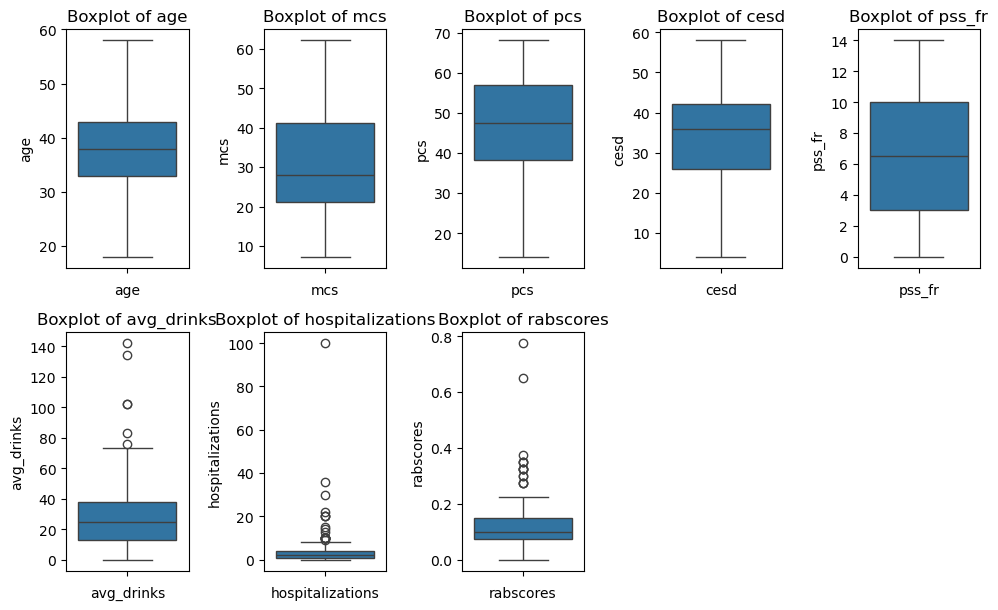

In [52]:
# Check data distribution by display the boxplots using matplotlib and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on numerical columns
numerical_columns = ['age', 'mcs', 'pcs', 'cesd', 'pss_fr', 'avg_drinks', 'hospitalizations', 'rabscores']

# Create boxplots to check for outliers in numerical variables
plt.figure(figsize=(10, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


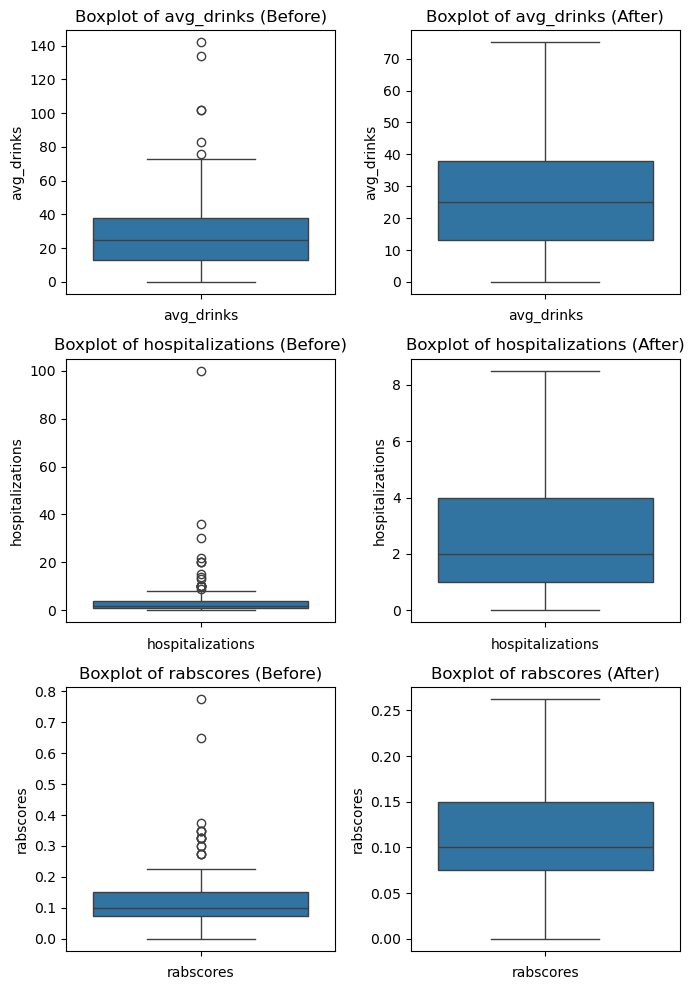

In [72]:
# Define a function to calculate outlier thresholds using the IQR method
def calculate_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Function to handle outliers by capping them at thresholds
def cap_outliers(series):
    lower_bound, upper_bound = calculate_outlier_bounds(series)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Identify columns for outlier handling
columns_to_handle = ['avg_drinks', 'hospitalizations', 'rabscores']

# Apply the outlier capping function to each column
data_cleaned = data.copy()
for column in columns_to_handle:
    data_cleaned[column] = cap_outliers(data_cleaned[column])

# Display the summary statistics before and after outlier handling
summary_before = data[columns_to_handle].describe()
summary_after = data_cleaned[columns_to_handle].describe()


# Plot boxplots before and after outlier handling for visual comparison
plt.figure(figsize=(7, 10))
for i, column in enumerate(columns_to_handle, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column} (Before)')
    plt.xlabel(column)
    
    plt.subplot(3, 2, 2*i)
    sns.boxplot(data_cleaned[column])
    plt.title(f'Boxplot of {column} (After)')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [34]:
# Function to identify outliers before IQR methods
def identify_outliers(series):
    lower_bound, upper_bound = calculate_outlier_bounds(series)
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Identify outliers for each numerical variable before IQR methods
outliers_summary = {}
for column in numerical_columns:
    outliers = identify_outliers(data[column])
    outliers_summary[column] = {
        'Number of Outliers': len(outliers),
        'Outlier Values': outliers.tolist(),
        'Maximum values' : outliers.max()
    }

# Display the summary of outliers before IQR methods
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')
outliers_summary_df

,Number of Outliers,Outlier Values,Maximum values
age,0,[],NaN
mcs,0,[],NaN
pcs,0,[],NaN
cesd,0,[],NaN
pss_fr,0,[],NaN
avg_drinks,6,"[102, 102, 134, 142, 83, 76]",142.000
hospitalizations,18,"[22, 14, 10, 20, 9, 20, 15, 10, 13, 20, 10, 10...",100.000
rabscores,15,"[0.325, 0.65, 0.35, 0.325, 0.775, 0.325, 0.375...",0.775


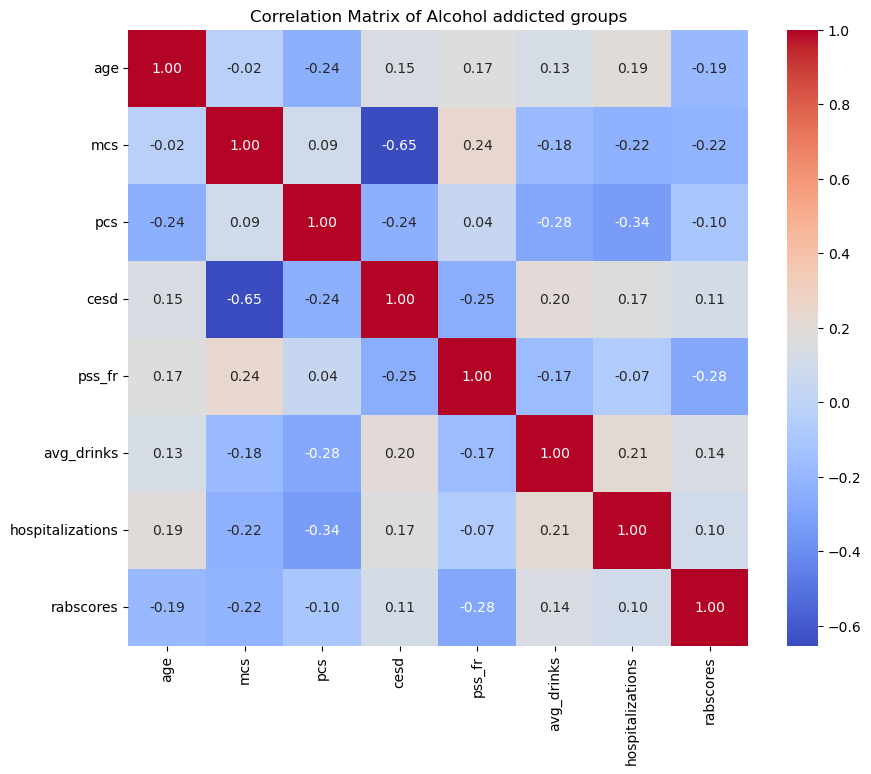

In [74]:
# Calculate correlation matrix after Winsorization
correlation_after = data_cleaned[numerical_columns].corr()

# Plot heatmap for the correlation matrix after Winsorization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_after, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Alcohol addicted groups")
plt.show()


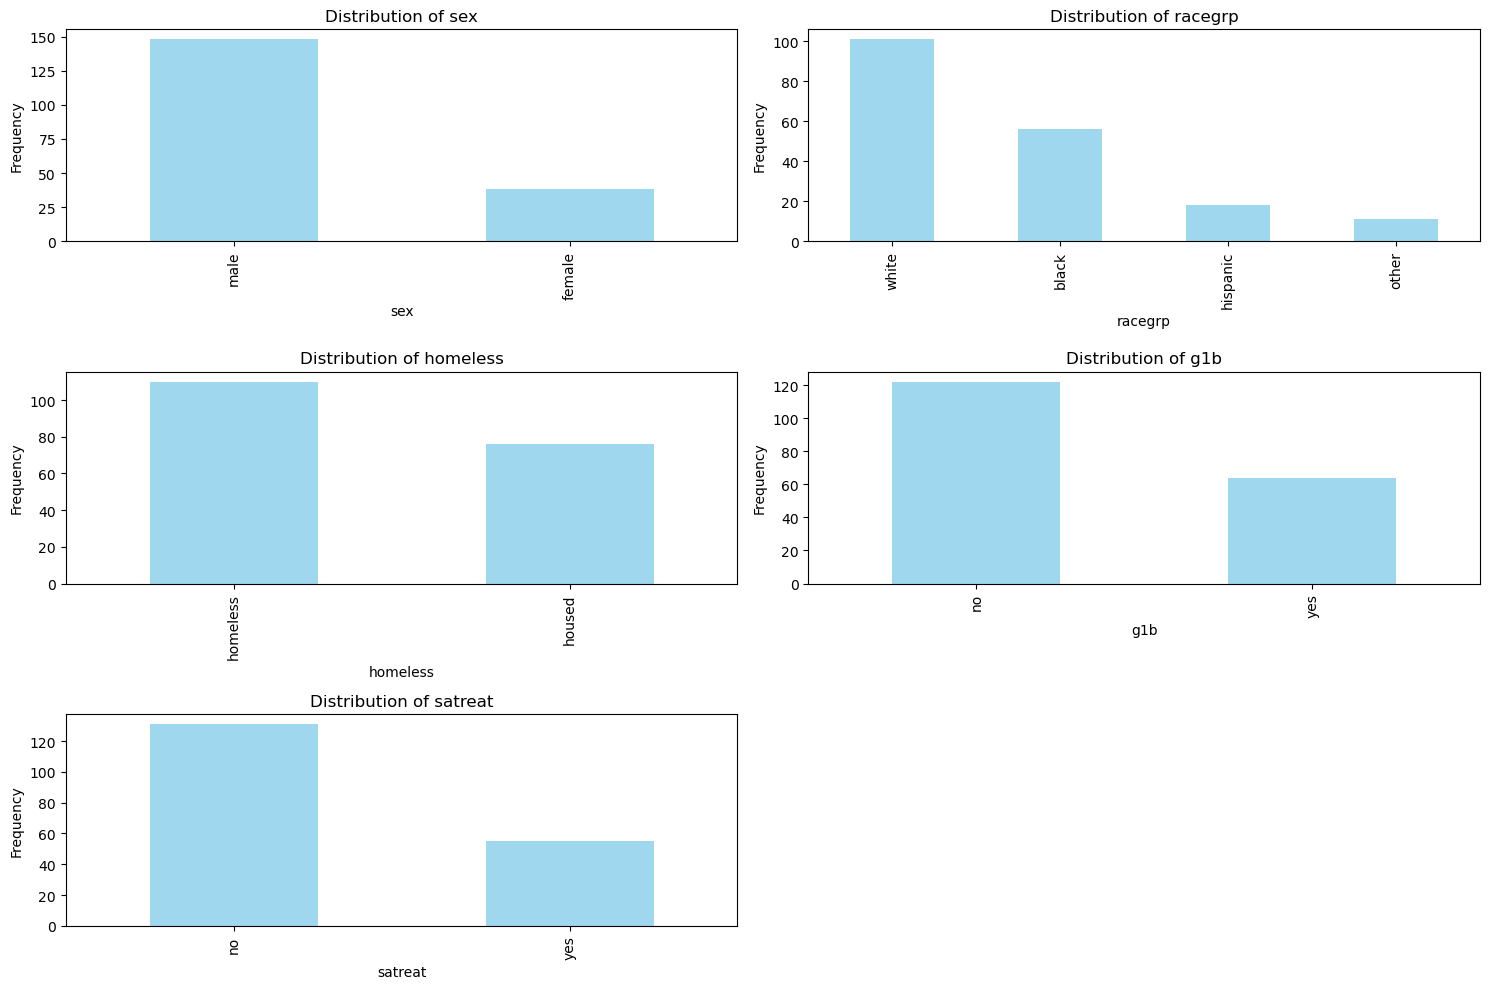

In [78]:
categorical_columns = ['sex', 'racegrp', 'homeless', 'g1b', 'satreat']

# Plot bar charts for the categorical variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    data[column].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()